### By Andrew Marasco 12/13/2025

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA
from datetime import datetime

### Part 1: Wine Classification System

A premium wine distributor needs to automatically classify wines based on their chemical properties for inventory management and quality control.

You'll use k-Nearest Neighbors (k-NN) with PCA to create an accurate classification model that can identify wine varieties from their measurable attributes, optimizing the classification through systematic hyperparameter tuning.

In [2]:
# Loading data into Pandas DataFrames

df = pd.read_csv("wine_data.csv")
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

<Figure size 1500x1000 with 0 Axes>

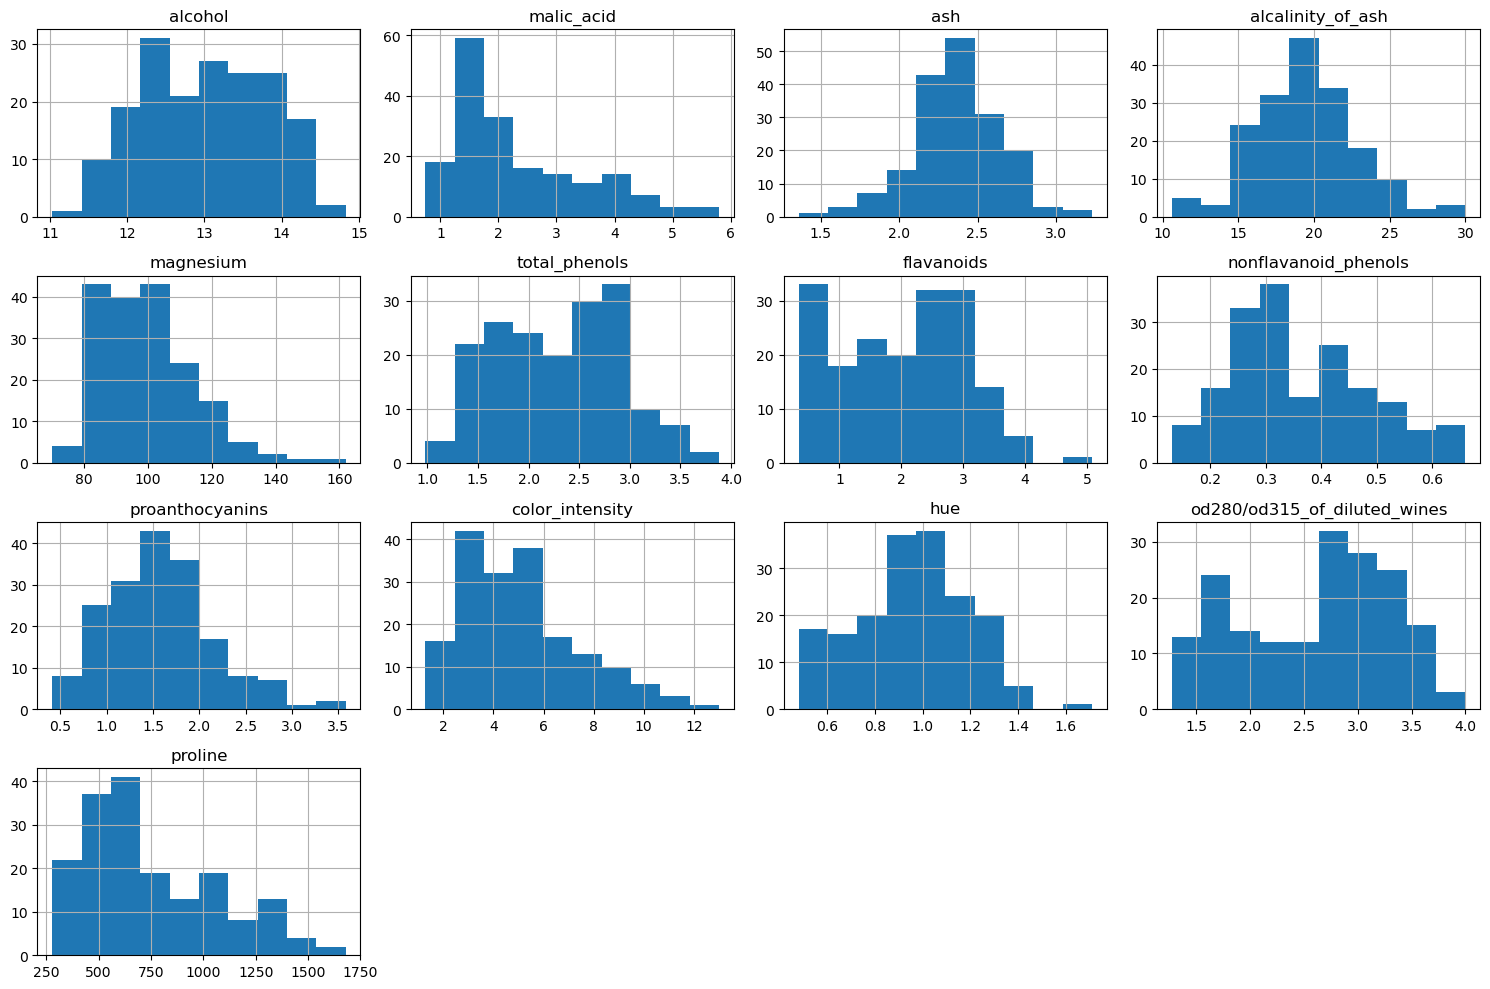

In [4]:
# Visualizing Data Distributions
wine_columns = df.columns.tolist()
wine_columns.remove("target")

plt.figure(figsize=(15, 10))
df[wine_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

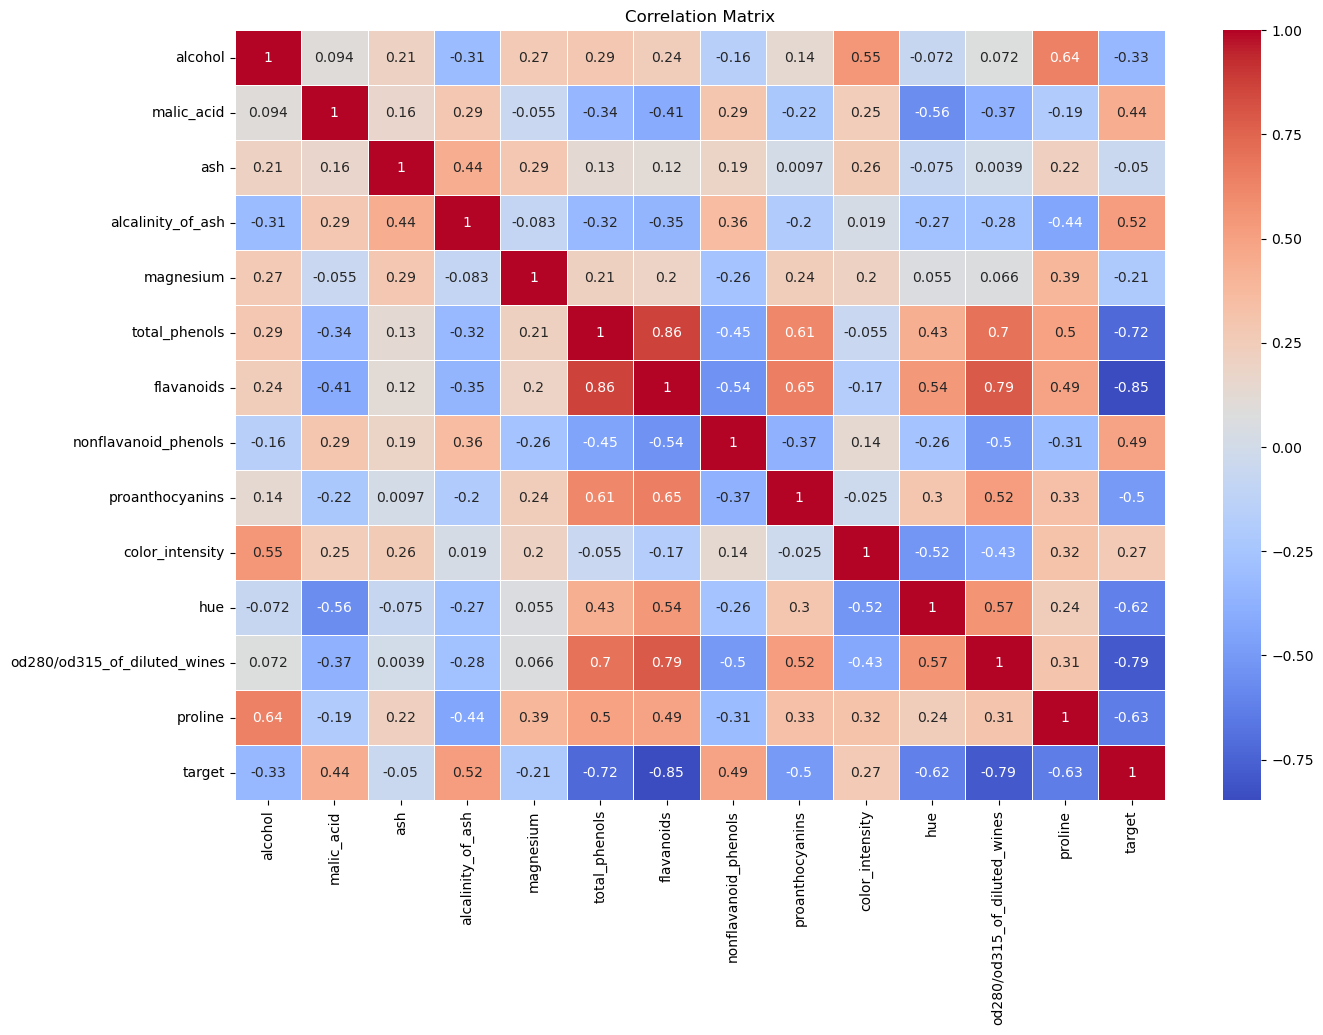

In [5]:
# Visualizing Correlation Matrix for Columns

wine_corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(wine_corr, annot=True, cmap='coolwarm', linewidth=0.6)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Seperating Features and Target

X = df.drop(columns="target")
y = df["target"]

In [7]:
# encode target variable
y_encoded = y

In [8]:
# Train-Test Splitting

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [9]:
# Building Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("knn", KNeighborsClassifier())
])


In [10]:
# Tuning Hyperparameters with GridSearchCV (tuning number of neighbors and distance metrics)

param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11],
    "knn__metric": ["euclidean", "manhattan", "minkowski"]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__metric': ['euclidean', 'manhattan', ...], 'knn__n_neighbors': [3, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [11]:
# Found Best Parameters

grid_search.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 5}

In [12]:
# Training the Final MOdel and Predicting

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [13]:
# Model Evaluation with Classification Report and Accuracy Score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.9722222222222222,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       1.00      0.93      0.96        14\n           2       0.91      1.00      0.95        10\n\n    accuracy                           0.97        36\n   macro avg       0.97      0.98      0.97        36\nweighted avg       0.97      0.97      0.97        36\n')

Conclusion: Overall performance was 0.9722 (97.22%), meaning the model correctly classified about97% of unseen data in the test set. This suggests well-tuned hyperparameters and appropriate levels of preprocessing. The PCA reduced noise and correlation among chemical features and allowed the K-NN to process more important distances in the lower-dimensional space. The business context of this model would be the ability to classify wine varieties based on chemical composition alonw with accuracy greater than 97%. This could translate to automation of QC, faster sorting and catergorizing of inventory, and less need for manual labeling. 

# Part 2: Build Agricultural Feed Recommendation System Using the Chickwts Dataset

In [14]:
# Loading and Inspecting Chickwts dataset

df_chick = pd.read_csv("chickwts_data.csv")
print(df_chick.head())

           feed_name  proteinContent  fatContent  fiberContent  \
0          FirstPeck            19.5         3.2           2.4   
1    ChickStart Plus            18.2         3.8           3.9   
2  EarlyGrow Formula            19.3         4.6           3.2   
3  HatchMate Premier            20.2         3.7           3.8   
4        PeepNourish            19.2         3.9           4.2   

   calciumContent  phosphorusContent  moistureContent  ashContent  \
0            0.82               0.78             10.8         4.5   
1            3.02               0.68              9.3         6.9   
2            1.20               0.69             10.2         5.8   
3            3.16               0.63             11.4         5.7   
4            3.06               0.61              9.3         5.9   

   metabolizableEnergy  lysineContent  methionineContent  particleSize  \
0                 2921           0.96               0.43           3.5   
1                 2865           0.99   

In [15]:
print(f"Dataset Shape: {df_chick.shape}")
print(df_chick.info())
print(df_chick.describe())

Dataset Shape: (100, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureContent      100 non-null    float64
 7   ashContent           100 non-null    float64
 8   metabolizableEnergy  100 non-null    int64  
 9   lysineContent        100 non-null    float64
 10  methionineContent    100 non-null    float64
 11  particleSize         100 non-null    float64
 12  density              100 non-null    float64
 13  price                100 non-null    float64
 14  shelfLife            100 non-null    int64  
 15  weight          

In [16]:
# Extracting Numeric Columns and removing categorical column 'feed_name'
chicken_columns = df_chick.columns.to_list()
chicken_columns.remove("feed_name")

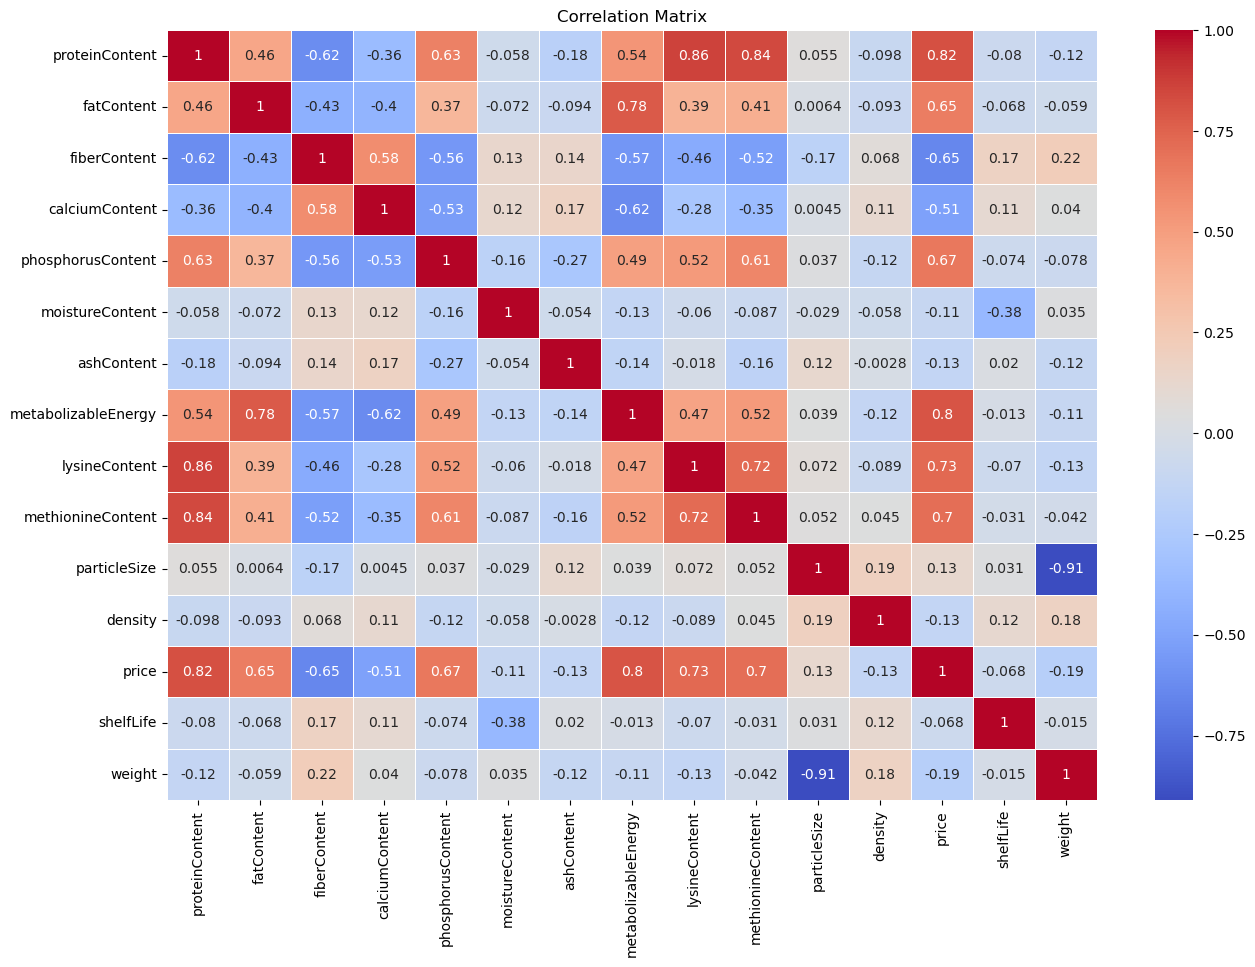

In [17]:
# Building Correlation Matrix
chicken_corr = df_chick[chicken_columns].corr()

plt.figure(figsize=(15,10))
sns.heatmap(chicken_corr, annot=True, cmap='coolwarm', linewidths=0.6)
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Aggregating by Feed Type

feed_summary = (
    df_chick.groupby("feed_name")["weight"]
    .mean()
    .reset_index()
)

feed_summary

,feed_name,weight
0,BabyBirdBlend,23.225806
1,BreederAdvance Complete,26.000000
2,BreederChoice Complete,26.400000
3,BreederElite Complete,23.103448
4,BreederOptimal Formula,26.000000
...,...,...
95,ShellStrength Pro,36.500000
96,StartRight Formula,24.137931
97,TeenChick Formula,24.666667
98,WeightGain Pro,18.750000


In [19]:
# Preprocessing: Standardizing Weight Feature

scaler = StandardScaler()
weights_scaled = scaler.fit_transform(feed_summary[["weight"]])

In [20]:
# Applying PCA (1 component)

pca = PCA(n_components=1, random_state=42)
weights_pca = pca.fit_transform(weights_scaled)

feed_summary["pca_weight"] = weights_pca
feed_summary


,feed_name,weight,pca_weight
0,BabyBirdBlend,23.225806,-0.556542
1,BreederAdvance Complete,26.000000,-0.162846
2,BreederChoice Complete,26.400000,-0.106081
3,BreederElite Complete,23.103448,-0.573907
4,BreederOptimal Formula,26.000000,-0.162846
...,...,...,...
95,ShellStrength Pro,36.500000,1.327248
96,StartRight Formula,24.137931,-0.427099
97,TeenChick Formula,24.666667,-0.352065
98,WeightGain Pro,18.750000,-1.191721


In [21]:
# Building cosine similarity between feed types

similarity_matrix = cosine_similarity(weights_pca)

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=feed_summary["feed_name"],
    columns=feed_summary["feed_name"]
)

similarity_df

feed_name,BabyBirdBlend,BreederAdvance Complete,BreederChoice Complete,BreederElite Complete,BreederOptimal Formula,BreederPerfect Plus,BreederPrime Formula,BreederVital Premium,BroilerBoost Supreme,BroilerBulk Ultra,...,ReproMax Enhanced,ReproNutrient Formula,ReproSuccess Formula,ShellBuilder Pro,ShellMax Enhanced,ShellStrength Pro,StartRight Formula,TeenChick Formula,WeightGain Pro,YolkPerfect Premium
feed_name,,,,,,,,,,,,,,,,,,,,,
BabyBirdBlend,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0
BreederAdvance Complete,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0
BreederChoice Complete,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0
BreederElite Complete,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0
BreederOptimal Formula,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ShellStrength Pro,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
StartRight Formula,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0
TeenChick Formula,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0


In [22]:
# Recommending Similar Feeds
def with_weight_recommendation(feed_name, top_n=5):
    if feed_name not in similarity_df.index:
        raise ValueError(f"{feed_name} is not in this list.")
    similar_feeds = similarity_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds

In [23]:
# Testing Function
with_weight_recommendations = with_weight_recommendation("BabyBirdBlend", 25)
print("Recommended Feeds: ]n", with_weight_recommendations)

Recommended Feeds: ]n feed_name
FinalBoost Premium         1.0
LayerProducer Plus         1.0
LayWell Complete           1.0
LayMore Gold               1.0
JuniorLayer Prep           1.0
HatchlingEssentials        1.0
HatchRate Pro              1.0
HatchPro Complete          1.0
HatchMore Premium          1.0
BreederAdvance Complete    1.0
GrowthMax Complete         1.0
GrowthFinish Advanced      1.0
FirstPeck                  1.0
FinishRight Premium        1.0
FinishPro Supreme          1.0
FinishLine Enhanced        1.0
MarketMax Formula          1.0
MatureBlend Complete       1.0
MeatYield Advanced         1.0
PulletPower Premium        1.0
WeightGain Pro             1.0
TeenChick Formula          1.0
StartRight Formula         1.0
ShellMax Enhanced          1.0
ReproNutrient Formula      1.0
Name: BabyBirdBlend, dtype: float64


# Part 3 Regional Crime Pattern Analysis from USArrests Dataset

In [24]:
# EDA

arrests = pd.read_csv("arrests_data.csv")
print(arrests.head())
print(arrests.info())
print(f"Dataset Shape: {arrests.shape}")
print(arrests.describe())



   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None
Dataset Shape: (50, 5)
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000 

In [25]:
arrest_columns = arrests.columns.to_list()
arrest_columns.remove("Unnamed: 0")

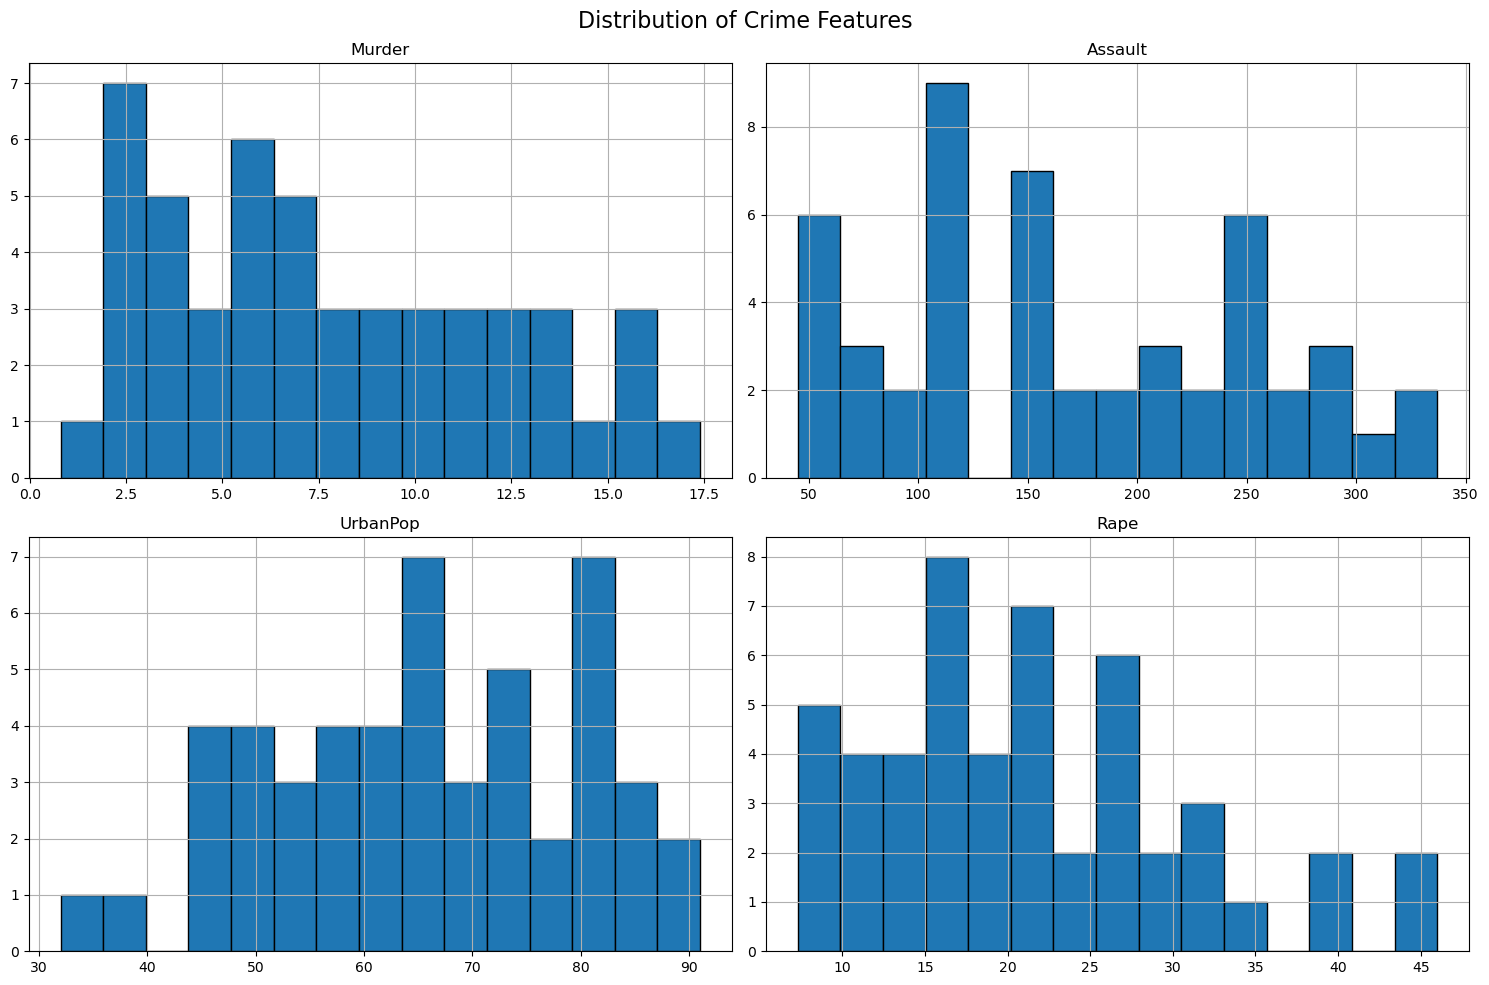

In [26]:
arrests[arrest_columns].hist(
    bins=15,
    figsize=(15, 10),
    edgecolor="black"
)
plt.suptitle("Distribution of Crime Features", fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

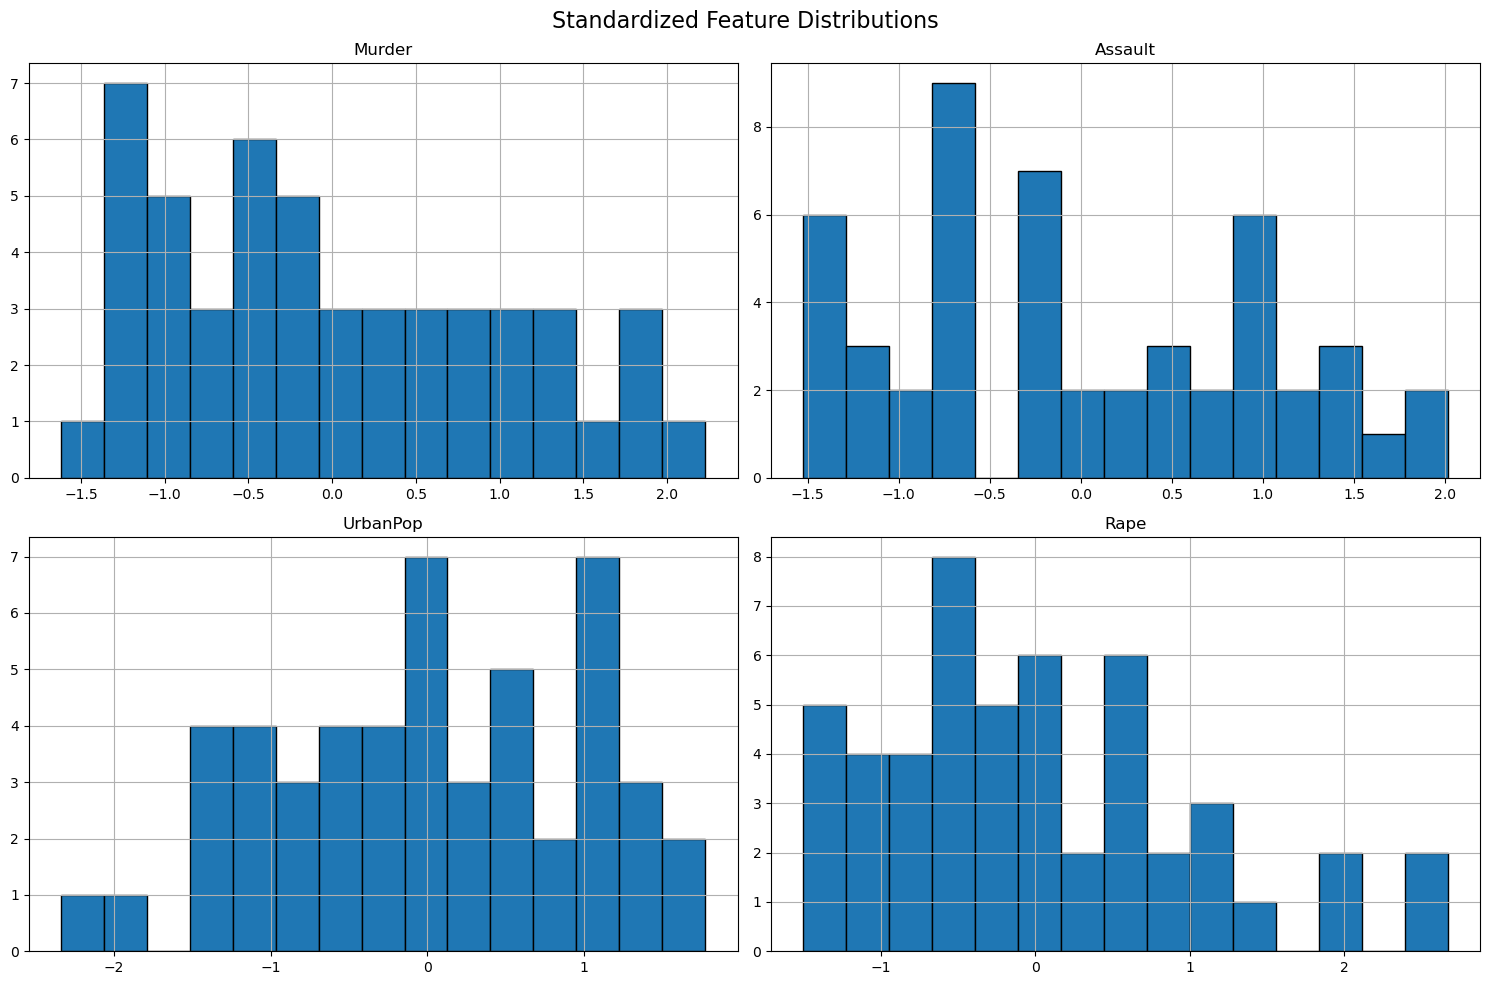

In [27]:
# Visualize Data to examine Distributions
scaler = StandardScaler()
arrests_scaled = scaler.fit_transform(arrests[arrest_columns])


plt.figure(figsize=(15, 10))
pd.DataFrame(arrests_scaled, columns=arrest_columns).hist(
    bins=15,
    figsize=(15,10),
    edgecolor="black"
)
plt.suptitle("Standardized Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
arrests_numeric = arrests[arrest_columns]

In [29]:
arrests_corr = arrests_numeric.corr()

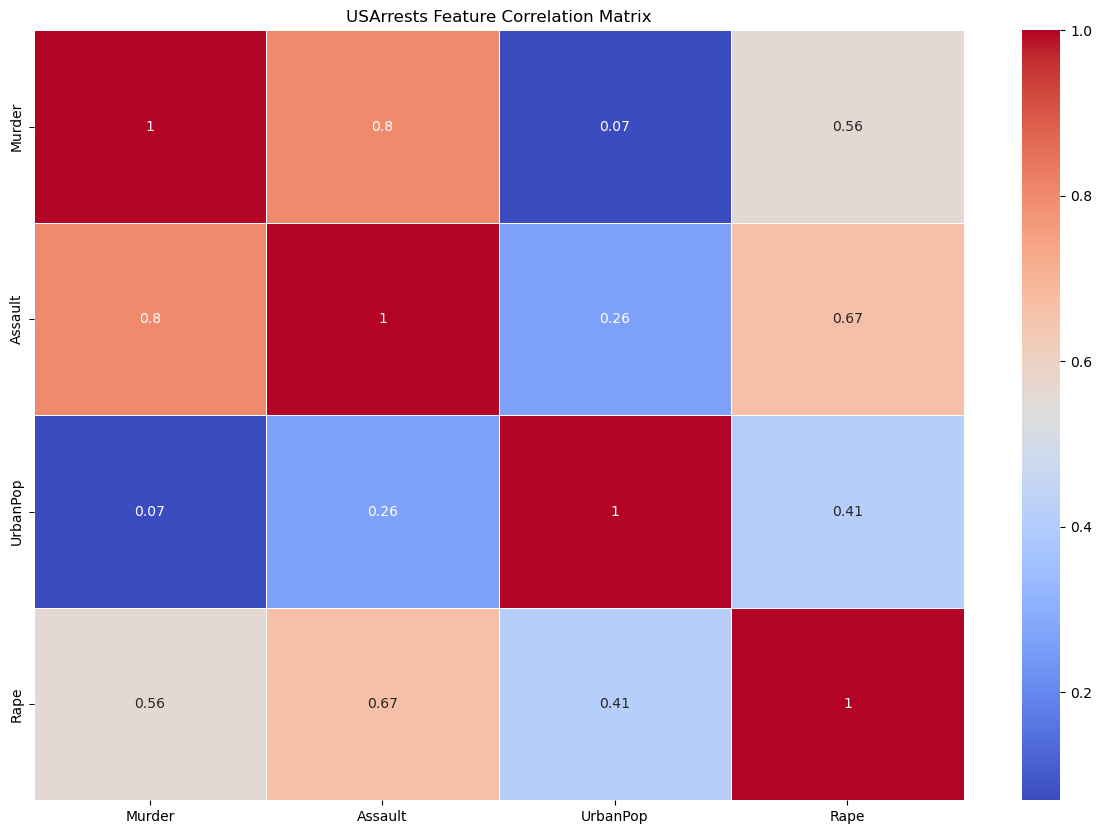

In [30]:
# Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(
    arrests_corr,
    annot=True,
    cmap='coolwarm',
    linewidth=0.5
)
plt.title("USArrests Feature Correlation Matrix")
plt.show()

In [31]:
# Cleaning and Preparing Dataset
states = arrests["Unnamed: 0"]
X = arrests.drop(columns=["Unnamed: 0"])

In [32]:
# Standardizing Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Selecting Top 3 Relevant Features

selected_features = ["Murder", "Assault", "Rape"]
X_selected = X[selected_features]

In [34]:
# Applying PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_



array([0.62006039, 0.24744129])

In [35]:
# Creating PCA DataFrame

pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"],
    index=arrests["Unnamed: 0"]
)

pca_df.head()

,PC1,PC2
Unnamed: 0,,
Alabama,0.985566,-1.133392
Alaska,1.950138,-1.073213
Arizona,1.763164,0.745957
Arkansas,-0.141420,-1.119797
California,2.523980,1.542934


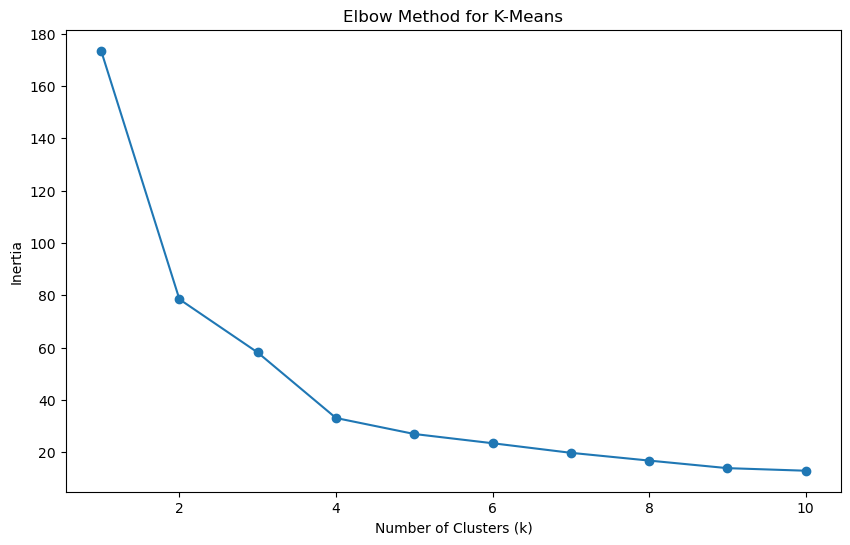

In [37]:
# Employing Elbow Method

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

In [38]:
# Aplpying K-Means with Chosen K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

pca_df["KMeans_Cluster"] = kmeans_labels
pca_df.head()

,PC1,PC2,KMeans_Cluster
Unnamed: 0,,,
Alabama,0.985566,-1.133392,2
Alaska,1.950138,-1.073213,2
Arizona,1.763164,0.745957,1
Arkansas,-0.141420,-1.119797,2
California,2.523980,1.542934,1


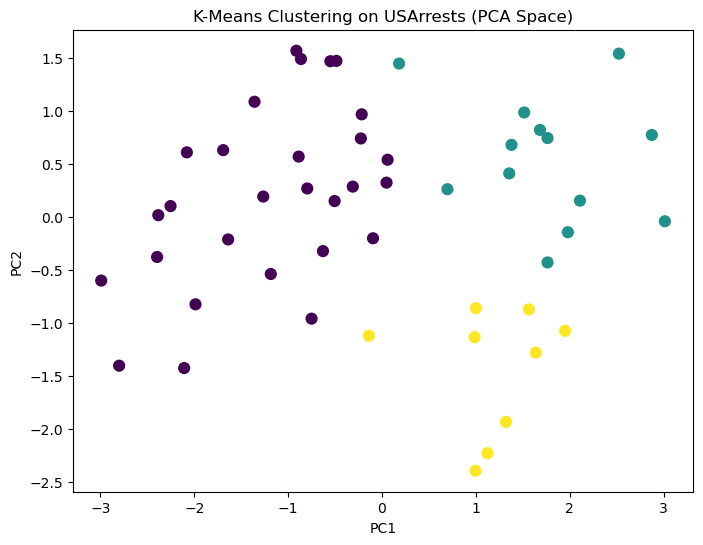

In [39]:
# Visualize K_means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["KMeans_Cluster"],
    cmap="viridis",
    s=60
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering on USArrests (PCA Space)")
plt.show()

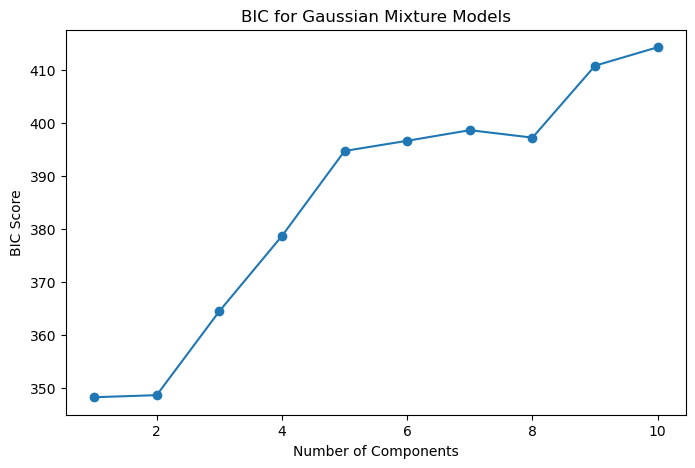

In [41]:
# BIC Curve

bic_scores = []
n_components_range = range(1, 11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(pca_df[["PC1", "PC2"]])
    bic_scores.append(gmm.bic(pca_df[["PC1", "PC2"]]))

plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("BIC Score")
plt.title("BIC for Gaussian Mixture Models")
plt.show()

In [42]:
# Fit Final GMM

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(pca_df[["PC1", "PC2"]])

pca_df["GMM_Cluster"] = gmm_labels

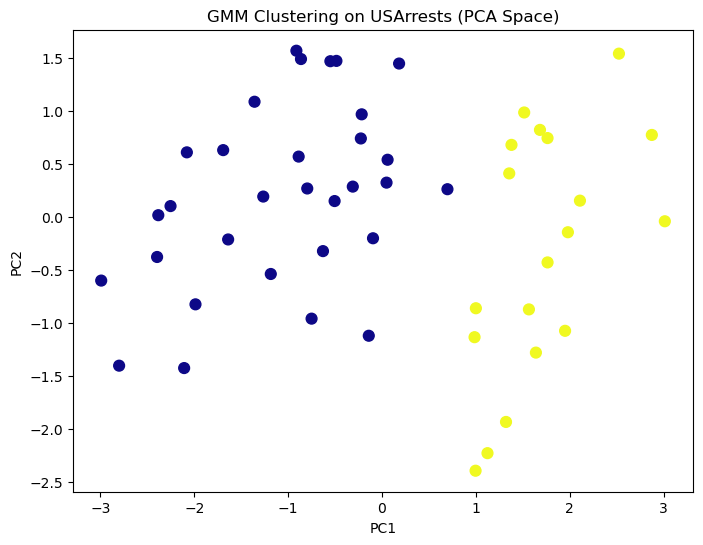

In [43]:
# Visualize GMM Clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["GMM_Cluster"],
    cmap="plasma",
    s=60
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("GMM Clustering on USArrests (PCA Space)")
plt.show()

# Conclusion: While using the Bayesian Information Criterion (BIC), the Gaussian Mixture Model achieved its minimum score around 1–2 components. I found that a single cluster provides no segmentation value, so I selected 2 components as the optimal balance between model fit and interpretability.

# The K-Means produced 3 hard clusters that were based on distance in the PCA space. The GMM identified two probabilistic clusters. The GMM favored fewer clusters because of the penalty it imposes for model complexity. 